# VIH Data Analysis Project - Democratic Republic of Congo
## HIV/AIDS Data Analytics Portfolio

**Author:** Bienvenu Mwenyemali  
**Date:** February 2026  
**Description:** Comprehensive HIV/AIDS data analysis showcasing Python skills with data extraction, cleaning, exploration, visualization, and statistical analysis

---

## Section 1: Import Libraries

In [1]:
# Install required packages (uncomment if needed)
# !pip install pandas numpy matplotlib seaborn scipy openpyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore, pearsonr, spearmanr, shapiro, normaltest
import warnings
warnings.filterwarnings('ignore')

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## Section 2: Data Extraction from Excel

In [3]:
def load_data(filepath):
    """
    Function to load data from Excel file
    Parameters:
        filepath (str): Path to the Excel file
    Returns:
        DataFrame: Pandas DataFrame containing the data
    """
    try:
        df = pd.read_excel(filepath)
        print(f"Data successfully loaded from: {filepath}")
        print(f"Dataset shape: {df.shape[0]} rows x {df.shape[1]} columns")
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return None
    except Exception as e:
        print(f"Error loading file: {str(e)}")
        return None

# Load the dataset
df = load_data('datavih.xlsx')

Data successfully loaded from: datavih.xlsx
Dataset shape: 85811 rows x 8 columns


## Section 3: Data Exploration

In [4]:
# DataFrame Info
print("=" * 60)
print("DATAFRAME INFO")
print("=" * 60)
df.info()

DATAFRAME INFO
<class 'pandas.DataFrame'>
RangeIndex: 85811 entries, 0 to 85810
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   provinces      85811 non-null  str  
 1   annees         85811 non-null  int64
 2   trimestres     85811 non-null  str  
 3   indicateurs    85808 non-null  str  
 4   cibles         83979 non-null  str  
 5   sexes          84014 non-null  str  
 6   tranches_ages  84014 non-null  str  
 7   Valeur         85811 non-null  int64
dtypes: int64(2), str(6)
memory usage: 5.2 MB


In [5]:
# First 10 rows
print("First 10 Rows:")
df.head(10)

First 10 Rows:


,provinces,annees,trimestres,indicateurs,cibles,sexes,tranches_ages,Valeur
0,Haut-Katanga,2020,T1,Nombre de préservatifs masculins distribués,Population Générale,Masculin,15 à 19 ans,1232
1,Haut-Katanga,2020,T1,Nombre de préservatifs masculins distribués,Population Générale,Masculin,25 à 49 ans,109765
2,Haut-Katanga,2020,T1,Nombre de préservatifs masculins distribués,Population Générale,Féminin,15 à 19 ans,21345
3,Haut-Katanga,2020,T1,Nombre de préservatifs masculins distribués,Population Générale,Masculin,15 à 19 ans,15898
4,Haut-Katanga,2020,T1,Nombre de préservatifs masculins distribués,Population Générale,Masculin,>= 50 ans,56424
5,Haut-Katanga,2020,T1,Nombre de préservatifs masculins distribués,Population Générale,Féminin,>= 50 ans,49512
6,Haut-Katanga,2020,T1,Nombre de préservatifs masculins distribués,Population Générale,Féminin,20 à 24 ans,56120
7,Haut-Katanga,2020,T1,Nombre de préservatifs masculins distribués,Population Générale,Masculin,20 à 24 ans,76549
8,Haut-Katanga,2020,T1,Nombre de préservatifs masculins distribués,Population Générale,Féminin,25 à 49 ans,188765
9,Haut-Katanga,2020,T2,Nombre de préservatifs masculins distribués,Miniers / Creuseurs,Masculin,15 à 19 ans,4500


In [6]:
# Last 5 rows
print("Last 5 Rows:")
df.tail(5)

Last 5 Rows:


,provinces,annees,trimestres,indicateurs,cibles,sexes,tranches_ages,Valeur
85806,Haut-Katanga,2023,T2,Nombre d'engagements pris par les organes de p...,NaN,NaN,NaN,10
85807,Haut-Katanga,2023,T2,Nombre d’acteurs qui accèdent et utilisent les...,NaN,NaN,NaN,1
85808,Haut-Katanga,2023,T1,Nombre d’acteurs qui accèdent et utilisent les...,NaN,NaN,NaN,4
85809,Haut-Katanga,2023,T1,Nombre d'établissement primaires ayant intégré...,NaN,NaN,NaN,3121
85810,Haut-Katanga,2023,T1,Nombre de FOSA ayant intégré les services de PF,NaN,NaN,NaN,1246


In [7]:
# Column names and data types
print("Column Names and Data Types:")
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"  {i}. {col}: {dtype}")

Column Names and Data Types:
  1. provinces: str
  2. annees: int64
  3. trimestres: str
  4. indicateurs: str
  5. cibles: str
  6. sexes: str
  7. tranches_ages: str
  8. Valeur: int64


In [8]:
# Unique values analysis
print("=" * 60)
print("UNIQUE VALUES PER COLUMN")
print("=" * 60)
for col in df.columns:
    print(f"  {col}: {df[col].nunique()} unique values")

UNIQUE VALUES PER COLUMN
  provinces: 26 unique values
  annees: 5 unique values
  trimestres: 4 unique values
  indicateurs: 118 unique values
  cibles: 57 unique values
  sexes: 2 unique values
  tranches_ages: 8 unique values
  Valeur: 9524 unique values


In [9]:
# Display unique provinces (26 provinces of DRC)
print("Unique Provinces (26 provinces of DRC):")
print(sorted(df['provinces'].unique().tolist()))

Unique Provinces (26 provinces of DRC):
['Bas-Uele', 'Haut-Katanga', 'Haut-Lomami', 'Haut-Uele', 'Ituri', 'Kasaï', 'Kasaï-Central', 'Kasaï-Oriental', 'Kinshasa', 'Kongo-Central', 'Kwango', 'Kwilu', 'Lomami', 'Lualaba', 'Mai-Ndombe', 'Maniema', 'Mongala', 'Nord-Kivu', 'Nord-Ubangi', 'Sankuru', 'Sud Kivu', 'Sud-Ubangi', 'Tanganyika', 'Tshopo', 'Tshuapa', 'Équateur']


In [10]:
# Display unique years
print("Unique Years:")
print(sorted(df['annees'].unique()))

Unique Years:
[np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]


In [11]:
# Display unique indicators (sample - first 10)
print("Sample Indicators (first 10):")
for i, ind in enumerate(df['indicateurs'].unique()[:10], 1):
    print(f"  {i}. {ind}")

Sample Indicators (first 10):
  1. Nombre de préservatifs masculins distribués
  2. Nombre de personnes touchés par les programmes de CCSC  ( sensibilisés)
  3. Nombre d'enfants exposés au VIH ayant bénéficié du ADN PCR ou de la sérologie
  4. Nombre de gels lubrifiants distribués
  5. Nombre de cas de PVVIH sous Traitement Antirétroviral (TAR) qui ont fait l'objet d'un dépistage du virus de l'Hépatite C
  6. Nombre de préservatifs féminins distribués
  7. Nombre de clients diagnostiqués VIH+ informés des résultats
  8. Nombre de  PVVIH nouvellement diagnostiqué qui ont fait l’objet de la recherche active de la TB  selon les normes
  9. Nombre de PVVIH nouvellement dépistées et enrôlées dans les services de PEC du VIH
  10. Nombre de PVVIH nouvellement diagnostiqué éligibles à la prophylaxie de la TB qui reçoivent le TPT


## Section 4: Data Cleaning

In [12]:
def analyze_missing_values(df):
    """
    Analyze missing values in the DataFrame
    """
    missing = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing Count': missing.values,
        'Missing Percentage': missing_percent.values
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(
        'Missing Percentage', ascending=False
    )
    
    return missing_df

print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing_analysis = analyze_missing_values(df)
if len(missing_analysis) > 0:
    display(missing_analysis)
else:
    print("No missing values found!")

MISSING VALUES ANALYSIS


,Column,Missing Count,Missing Percentage
4,cibles,1832,2.134924
5,sexes,1797,2.094137
6,tranches_ages,1797,2.094137
3,indicateurs,3,0.003496


In [13]:
def clean_data(df):
    """
    Comprehensive data cleaning function
    """
    df_clean = df.copy()
    
    print("=" * 60)
    print("CLEANING PROCESS")
    print("=" * 60)
    
    # 1. Handle missing values in categorical columns
    categorical_cols = ['provinces', 'trimestres', 'indicateurs', 'cibles', 'sexes', 'tranches_ages']
    for col in categorical_cols:
        if col in df_clean.columns:
            missing_count = df_clean[col].isnull().sum()
            if missing_count > 0:
                df_clean[col] = df_clean[col].fillna('Non spécifié')
                print(f"  - Filled {missing_count} missing values in '{col}' with 'Non spécifié'")
    
    # 2. Handle missing numeric values
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        missing_count = df_clean[col].isnull().sum()
        if missing_count > 0:
            median_val = df_clean[col].median()
            df_clean[col] = df_clean[col].fillna(median_val)
            print(f"  - Filled {missing_count} missing values in '{col}' with median: {median_val}")
    
    # 3. Remove duplicates
    initial_rows = len(df_clean)
    df_clean = df_clean.drop_duplicates()
    duplicates_removed = initial_rows - len(df_clean)
    if duplicates_removed > 0:
        print(f"  - Removed {duplicates_removed} duplicate rows")
    else:
        print("  - No duplicate rows found")
    
    # 4. Standardize text columns
    for col in categorical_cols:
        if col in df_clean.columns and df_clean[col].dtype == 'object':
            df_clean[col] = df_clean[col].str.strip()
    
    print(f"\n  Final cleaned dataset shape: {df_clean.shape}")
    
    return df_clean

df_clean = clean_data(df)

CLEANING PROCESS
  - Filled 3 missing values in 'indicateurs' with 'Non spécifié'
  - Filled 1832 missing values in 'cibles' with 'Non spécifié'
  - Filled 1797 missing values in 'sexes' with 'Non spécifié'
  - Filled 1797 missing values in 'tranches_ages' with 'Non spécifié'
  - Removed 1844 duplicate rows

  Final cleaned dataset shape: (83967, 8)


## Section 5: Descriptive Statistics

In [14]:
def descriptive_statistics(df, column='Valeur'):
    """
    Calculate comprehensive descriptive statistics
    """
    data = df[column].dropna()
    
    stats_dict = {
        'Count': len(data),
        'Mean': data.mean(),
        'Median': data.median(),
        'Mode': data.mode().iloc[0] if len(data.mode()) > 0 else np.nan,
        'Standard Deviation': data.std(),
        'Variance': data.var(),
        'Min': data.min(),
        'Max': data.max(),
        'Range': data.max() - data.min(),
        'Q1 (25%)': data.quantile(0.25),
        'Q2 (50%)': data.quantile(0.50),
        'Q3 (75%)': data.quantile(0.75),
        'IQR': data.quantile(0.75) - data.quantile(0.25),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis(),
        'Coefficient of Variation': (data.std() / data.mean()) * 100
    }
    
    return pd.DataFrame(list(stats_dict.items()), columns=['Metric', 'Value'])

print("=" * 60)
print("DESCRIPTIVE STATISTICS FOR 'Valeur' COLUMN")
print("=" * 60)
desc_stats = descriptive_statistics(df_clean)
display(desc_stats)

DESCRIPTIVE STATISTICS FOR 'Valeur' COLUMN


,Metric,Value
0,Count,8.396700e+04
1,Mean,1.681751e+05
2,Median,5.300000e+01
3,Mode,0.000000e+00
4,Standard Deviation,1.543181e+07
5,Variance,2.381407e+14
6,Min,0.000000e+00
7,Max,1.580236e+09
8,Range,1.580236e+09
9,Q1 (25%),6.000000e+00


In [15]:
# Statistics by Province
print("=" * 60)
print("STATISTICS BY PROVINCE")
print("=" * 60)
province_stats = df_clean.groupby('provinces')['Valeur'].agg([
    'count', 'sum', 'mean', 'median', 'std', 'min', 'max'
]).round(2)
display(province_stats)

STATISTICS BY PROVINCE


,count,sum,mean,median,std,min,max
provinces,,,,,,,
Bas-Uele,801,3273663,4086.97,60.0,32511.61,1,743184
Haut-Katanga,12524,337840918,26975.48,216.0,618433.37,1,17812500
Haut-Lomami,2273,7844005,3450.95,91.0,11430.59,1,173289
Haut-Uele,2721,44020106,16177.91,78.0,517095.90,0,19076439
Ituri,2684,327543385,122035.54,144.0,1855704.50,1,40447003
Kasaï,5073,2187002,431.11,13.0,2752.62,1,68325
Kasaï-Central,1515,8949525,5907.28,118.0,40375.80,1,799213
Kasaï-Oriental,2574,10931338,4246.83,73.0,21953.82,1,635018
Kinshasa,4604,54997178,11945.52,140.0,191612.46,1,4577000


In [16]:
# Statistics by Year
print("=" * 60)
print("STATISTICS BY YEAR")
print("=" * 60)
year_stats = df_clean.groupby('annees')['Valeur'].agg([
    'count', 'sum', 'mean', 'median', 'std'
]).round(2)
display(year_stats)

STATISTICS BY YEAR


,count,sum,mean,median,std
annees,,,,,
2020,14952,530627822,35488.75,100.0,793227.65
2021,20730,12989263061,626592.53,11.0,31037870.32
2022,14811,381226972,25739.45,64.0,767655.77
2023,16807,179344044,10670.79,68.0,386756.30
2024,16667,40696197,2441.72,67.0,18307.98


In [17]:
# Statistics by Gender
print("=" * 60)
print("STATISTICS BY GENDER")
print("=" * 60)
gender_stats = df_clean.groupby('sexes')['Valeur'].agg([
    'count', 'sum', 'mean', 'median'
]).round(2)
display(gender_stats)

STATISTICS BY GENDER


,count,sum,mean,median
sexes,,,,
Féminin,43181,195405909,4525.28,56.0
Masculin,38991,240796939,6175.71,52.0
Non spécifié,1795,13684955248,7623930.50,8.0


## Section 6: Outlier Detection

In [18]:
def detect_outliers_iqr(data, column):
    """
    Detect outliers using IQR method
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    print(f"IQR Method Results for '{column}':")
    print(f"  Q1: {Q1:,.2f}")
    print(f"  Q3: {Q3:,.2f}")
    print(f"  IQR: {IQR:,.2f}")
    print(f"  Lower Bound: {lower_bound:,.2f}")
    print(f"  Upper Bound: {upper_bound:,.2f}")
    print(f"  Number of Outliers: {len(outliers)}")
    print(f"  Outlier Percentage: {(len(outliers)/len(data))*100:.2f}%")
    
    return outliers, lower_bound, upper_bound

print("=" * 60)
print("OUTLIER DETECTION")
print("=" * 60)
outliers_iqr, lb, ub = detect_outliers_iqr(df_clean, 'Valeur')

OUTLIER DETECTION
IQR Method Results for 'Valeur':
  Q1: 6.00
  Q3: 490.00
  IQR: 484.00
  Lower Bound: -720.00
  Upper Bound: 1,216.00
  Number of Outliers: 15259
  Outlier Percentage: 18.17%


In [19]:
def detect_outliers_zscore(data, column, threshold=3):
    """
    Detect outliers using Z-score method
    """
    z_scores = np.abs(zscore(data[column].dropna()))
    outliers_idx = np.where(z_scores > threshold)[0]
    
    print(f"\nZ-Score Method Results for '{column}' (threshold={threshold}):")
    print(f"  Number of Outliers: {len(outliers_idx)}")
    print(f"  Outlier Percentage: {(len(outliers_idx)/len(data))*100:.2f}%")
    
    return outliers_idx

outliers_zscore = detect_outliers_zscore(df_clean, 'Valeur')


Z-Score Method Results for 'Valeur' (threshold=3):
  Number of Outliers: 9
  Outlier Percentage: 0.01%


In [20]:
# Outlier analysis for specific indicator: Male Condoms Distributed
print("\n" + "=" * 60)
print("OUTLIER ANALYSIS: MALE CONDOMS DISTRIBUTED")
print("=" * 60)
preservatifs_data = df_clean[df_clean['indicateurs'] == 'Nombre de préservatifs masculins distribués']
if len(preservatifs_data) > 0:
    outliers_preserv, _, _ = detect_outliers_iqr(preservatifs_data, 'Valeur')
    print("\nSample outliers:")
    display(outliers_preserv[['provinces', 'annees', 'trimestres', 'Valeur']].head(10))


OUTLIER ANALYSIS: MALE CONDOMS DISTRIBUTED
IQR Method Results for 'Valeur':
  Q1: 100.00
  Q3: 5,498.00
  IQR: 5,398.00
  Lower Bound: -7,997.00
  Upper Bound: 13,595.00
  Number of Outliers: 856
  Outlier Percentage: 13.46%

Sample outliers:


,provinces,annees,trimestres,Valeur
1,Haut-Katanga,2020,T1,109765
2,Haut-Katanga,2020,T1,21345
3,Haut-Katanga,2020,T1,15898
4,Haut-Katanga,2020,T1,56424
5,Haut-Katanga,2020,T1,49512
6,Haut-Katanga,2020,T1,56120
7,Haut-Katanga,2020,T1,76549
8,Haut-Katanga,2020,T1,188765
10,Haut-Katanga,2020,T2,14400
12,Haut-Katanga,2020,T2,21600


## Section 7: Data Aggregation and Pivot Tables

In [21]:
# Pivot table: Values by Province and Year
print("=" * 60)
print("PIVOT TABLE: TOTAL VALUES BY PROVINCE AND YEAR")
print("=" * 60)
pivot_province_year = pd.pivot_table(
    df_clean,
    values='Valeur',
    index='provinces',
    columns='annees',
    aggfunc='sum',
    fill_value=0
)
display(pivot_province_year)

PIVOT TABLE: TOTAL VALUES BY PROVINCE AND YEAR


annees,2020,2021,2022,2023,2024
provinces,,,,,
Bas-Uele,1038146,1082808,398842,337320,416547
Haut-Katanga,223813781,82950447,11717269,13941634,5417787
Haut-Lomami,1544698,2590395,1422585,1084394,1201933
Haut-Uele,39789649,1082746,1329757,1010792,807162
Ituri,22418106,2786334,262230010,37759213,2349722
Kasaï,80904,308058,32833,734924,1030283
Kasaï-Central,2754878,2069792,0,2033209,2091646
Kasaï-Oriental,1707863,1785254,1731669,3508016,2198536
Kinshasa,4394359,41413040,4733945,4455834,0


In [22]:
# Pivot table: Values by Gender and Age Group
print("=" * 60)
print("PIVOT TABLE: TOTAL VALUES BY GENDER AND AGE GROUP")
print("=" * 60)
pivot_gender_age = pd.pivot_table(
    df_clean,
    values='Valeur',
    index='sexes',
    columns='tranches_ages',
    aggfunc='sum',
    fill_value=0
)
display(pivot_gender_age)

PIVOT TABLE: TOTAL VALUES BY GENDER AND AGE GROUP


tranches_ages,10 à 14 ans,15 à 19 ans,20 à 24 ans,25 à 49 ans,< 10 ans,< 15 ans,>= 15 ans,>= 50 ans,Non spécifié
sexes,,,,,,,,,
Féminin,3190818,4613936,15259277,14775351,4463595,30243924,119175144,3683864,0
Masculin,2876061,4308593,20273465,68280846,4233036,21852733,116102481,2869724,0
Non spécifié,0,0,0,0,0,0,0,0,13684955248


## Section 8: UNAIDS 95-95-95 Cascade Analysis

In [23]:
def calculate_unaids_95_95_95(df):
    """
    Calculate UNAIDS 95-95-95 cascade indicators
    - 1st 95: % of PLHIV who know their HIV status
    - 2nd 95: % of diagnosed PLHIV on treatment
    - 3rd 95: % of those on treatment with viral suppression
    """
    # Get relevant indicators
    tested = df[df['indicateurs'] == 'Nombre de clients testés']['Valeur'].sum()
    diagnosed = df[df['indicateurs'] == 'Nombre de clients diagnostiqués VIH+']['Valeur'].sum()
    on_tar = df[df['indicateurs'] == 'Nombre de PVVIH sous TAR']['Valeur'].sum()
    viral_suppressed = df[df['indicateurs'] == 'Nombre  de PVVIH sous TAR qui ont supprimée la charge virale']['Valeur'].sum()
    
    results = {
        'Total Tested': tested,
        'Total Diagnosed HIV+': diagnosed,
        'Total on TAR': on_tar,
        'Total with Viral Suppression': viral_suppressed
    }
    
    # Calculate cascade rates
    if diagnosed > 0:
        results['2nd 95 (Treatment Rate %)'] = (on_tar / diagnosed) * 100
    if on_tar > 0:
        results['3rd 95 (Viral Suppression Rate %)'] = (viral_suppressed / on_tar) * 100
    
    return results

print("=" * 60)
print("UNAIDS 95-95-95 CASCADE ANALYSIS")
print("=" * 60)
unaids_results = calculate_unaids_95_95_95(df_clean)
for key, value in unaids_results.items():
    if isinstance(value, float):
        print(f"  {key}: {value:,.2f}")
    else:
        print(f"  {key}: {value:,}")

UNAIDS 95-95-95 CASCADE ANALYSIS
  Total Tested: 11,962,463
  Total Diagnosed HIV+: 546,051
  Total on TAR: 4,929,446
  Total with Viral Suppression: 468,500
  2nd 95 (Treatment Rate %): 902.74
  3rd 95 (Viral Suppression Rate %): 9.50


In [24]:
# UNAIDS Cascade by Year
print("\n" + "=" * 60)
print("UNAIDS CASCADE BY YEAR")
print("=" * 60)

cascade_by_year = []
for year in sorted(df_clean['annees'].unique()):
    year_data = df_clean[df_clean['annees'] == year]
    tested = year_data[year_data['indicateurs'] == 'Nombre de clients testés']['Valeur'].sum()
    diagnosed = year_data[year_data['indicateurs'] == 'Nombre de clients diagnostiqués VIH+']['Valeur'].sum()
    on_tar = year_data[year_data['indicateurs'] == 'Nombre de PVVIH sous TAR']['Valeur'].sum()
    viral_suppressed = year_data[year_data['indicateurs'] == 'Nombre  de PVVIH sous TAR qui ont supprimée la charge virale']['Valeur'].sum()
    
    cascade_by_year.append({
        'Year': year,
        'Tested': tested,
        'Diagnosed HIV+': diagnosed,
        'On TAR': on_tar,
        'Viral Suppression': viral_suppressed
    })

cascade_df = pd.DataFrame(cascade_by_year)
display(cascade_df)


UNAIDS CASCADE BY YEAR


,Year,Tested,Diagnosed HIV+,On TAR,Viral Suppression
0,2020,2316245,160302,796139,86902
1,2021,2890156,139402,452698,85412
2,2022,2376958,117727,1018330,188680
3,2023,2462371,85639,1370283,60017
4,2024,1916733,42981,1291996,47489


## Section 9: Advanced Statistical Tests

In [25]:
# Normality Test (D'Agostino-Pearson)
print("=" * 60)
print("NORMALITY TEST (D'Agostino-Pearson)")
print("=" * 60)

sample_data = df_clean['Valeur'].dropna().sample(min(5000, len(df_clean)), random_state=42)

try:
    stat, p_value = normaltest(sample_data)
    print(f"  Test Statistic: {stat:.4f}")
    print(f"  P-value: {p_value:.4e}")
    print(f"  Result: {'Normal distribution' if p_value > 0.05 else 'Not normal distribution'}")
except Exception as e:
    print(f"  Test could not be performed: {e}")

NORMALITY TEST (D'Agostino-Pearson)
  Test Statistic: 16316.5775
  P-value: 0.0000e+00
  Result: Not normal distribution


In [26]:
# T-Test: Comparing Values between Genders
print("=" * 60)
print("T-TEST: COMPARING VALUES BETWEEN GENDERS")
print("=" * 60)

male_data = df_clean[df_clean['sexes'] == 'Masculin']['Valeur'].dropna()
female_data = df_clean[df_clean['sexes'] == 'Féminin']['Valeur'].dropna()

if len(male_data) > 0 and len(female_data) > 0:
    t_stat, p_value = stats.ttest_ind(
        male_data.sample(min(1000, len(male_data)), random_state=42),
        female_data.sample(min(1000, len(female_data)), random_state=42)
    )
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4e}")
    print(f"  Result: {'Significant difference' if p_value < 0.05 else 'No significant difference'}")

T-TEST: COMPARING VALUES BETWEEN GENDERS
  T-statistic: -1.0703
  P-value: 2.8460e-01
  Result: No significant difference


In [27]:
# Chi-square test for independence
print("=" * 60)
print("CHI-SQUARE TEST: PROVINCE VS GENDER INDEPENDENCE")
print("=" * 60)

contingency = pd.crosstab(df_clean['provinces'], df_clean['sexes'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print(f"  Chi-square statistic: {chi2:.4f}")
print(f"  P-value: {p_value:.4e}")
print(f"  Degrees of freedom: {dof}")
print(f"  Result: {'Dependent' if p_value < 0.05 else 'Independent'}")

CHI-SQUARE TEST: PROVINCE VS GENDER INDEPENDENCE
  Chi-square statistic: 2497.6682
  P-value: 0.0000e+00
  Degrees of freedom: 50
  Result: Dependent


## Section 10: Data Visualization

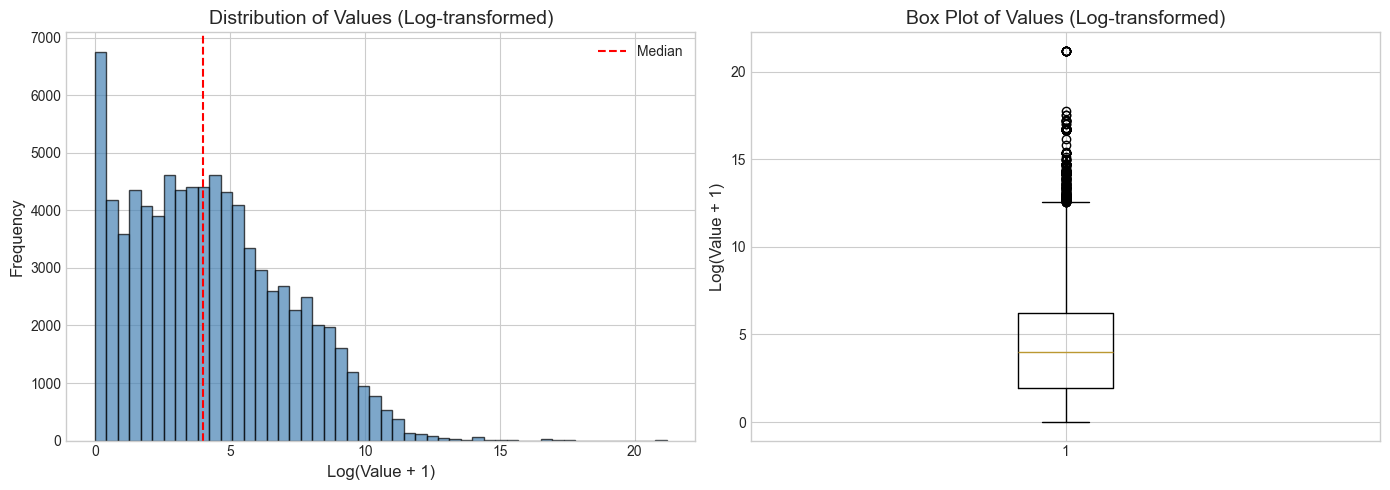

In [28]:
# Chart 1: Value Distribution (Log-transformed)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(np.log1p(df_clean['Valeur']), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Log(Value + 1)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Values (Log-transformed)', fontsize=14)
axes[0].axvline(np.log1p(df_clean['Valeur'].median()), color='red', linestyle='--', label='Median')
axes[0].legend()

# Box plot
axes[1].boxplot(np.log1p(df_clean['Valeur'].dropna()), vert=True)
axes[1].set_ylabel('Log(Value + 1)', fontsize=12)
axes[1].set_title('Box Plot of Values (Log-transformed)', fontsize=14)

plt.tight_layout()
plt.show()

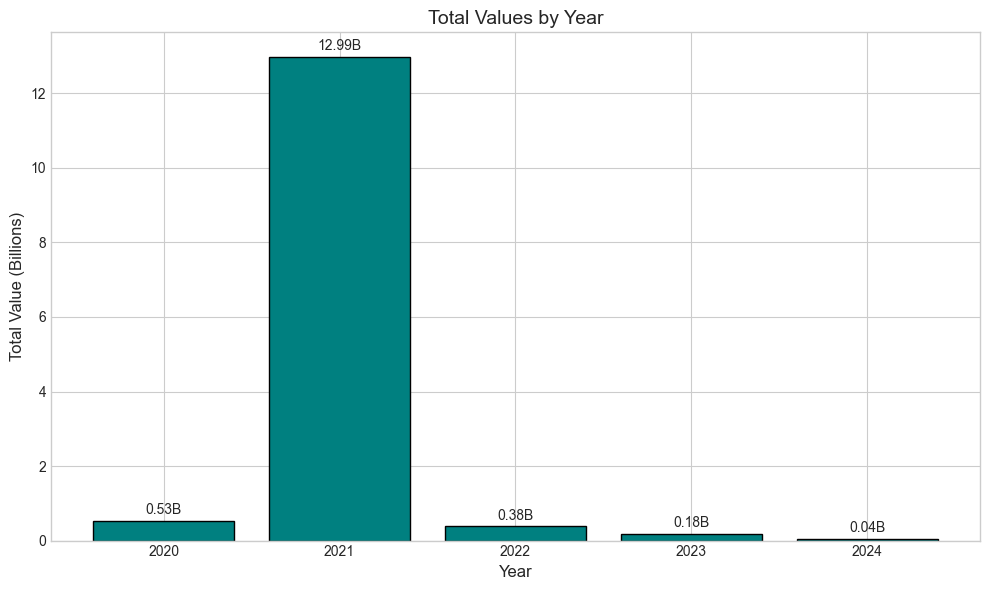

In [29]:
# Chart 2: Yearly Trend
yearly_totals = df_clean.groupby('annees')['Valeur'].sum() / 1e9

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(yearly_totals.index, yearly_totals.values, color='teal', edgecolor='black')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Value (Billions)', fontsize=12)
ax.set_title('Total Values by Year', fontsize=14)

for bar, val in zip(bars, yearly_totals.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
            f'{val:.2f}B', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

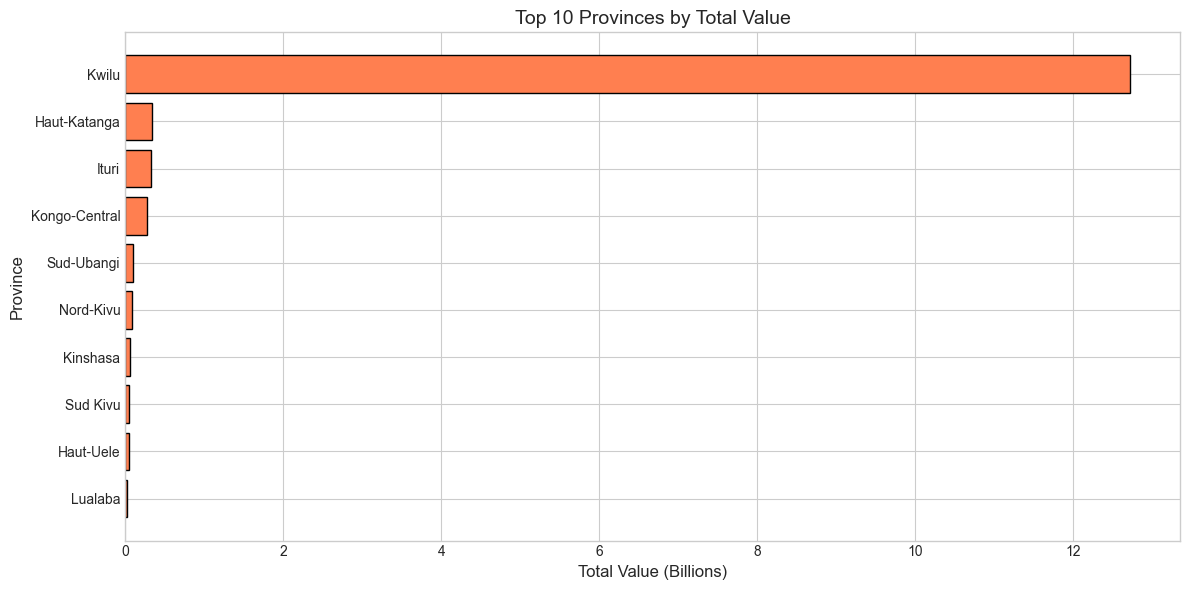

In [30]:
# Chart 3: Top 10 Provinces
top_provinces = df_clean.groupby('provinces')['Valeur'].sum().nlargest(10) / 1e9

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(top_provinces.index, top_provinces.values, color='coral', edgecolor='black')
ax.set_xlabel('Total Value (Billions)', fontsize=12)
ax.set_ylabel('Province', fontsize=12)
ax.set_title('Top 10 Provinces by Total Value', fontsize=14)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

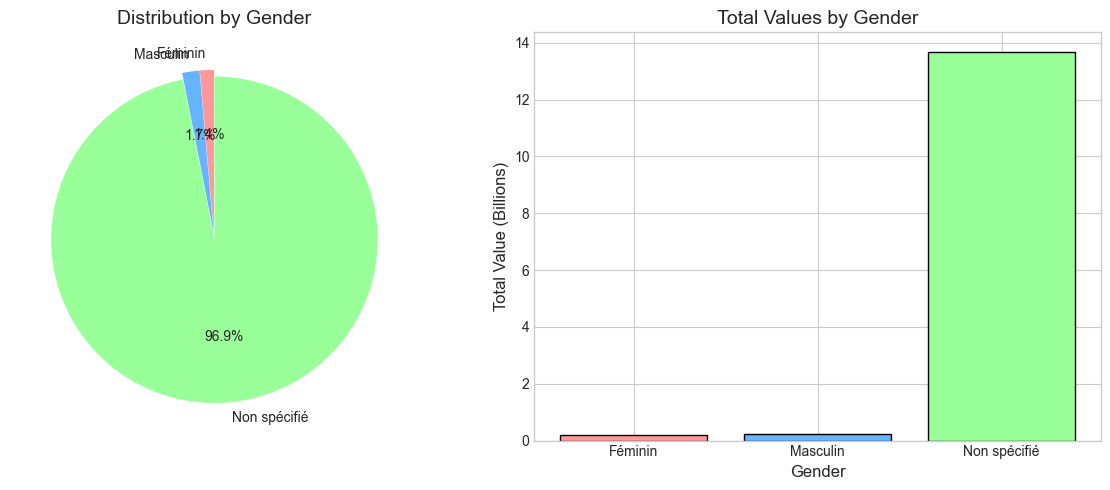

In [31]:
# Chart 4: Gender Distribution
gender_totals = df_clean.groupby('sexes')['Valeur'].sum()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

colors = ['#ff9999', '#66b3ff', '#99ff99']
axes[0].pie(gender_totals.values, labels=gender_totals.index, autopct='%1.1f%%',
            colors=colors, startangle=90, explode=[0.02]*len(gender_totals))
axes[0].set_title('Distribution by Gender', fontsize=14)

axes[1].bar(gender_totals.index, gender_totals.values / 1e9, color=colors, edgecolor='black')
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Total Value (Billions)', fontsize=12)
axes[1].set_title('Total Values by Gender', fontsize=14)

plt.tight_layout()
plt.show()

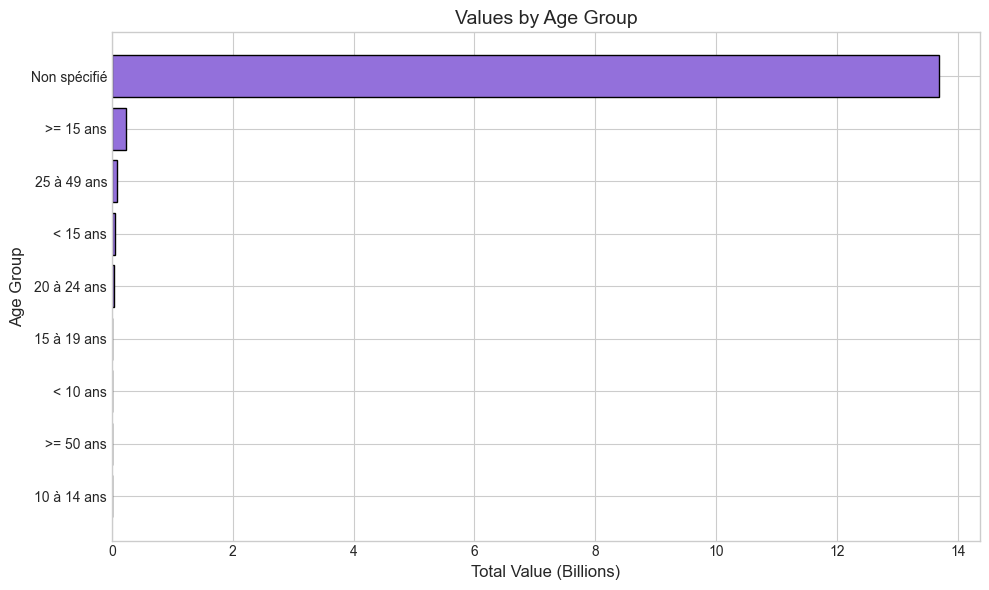

In [32]:
# Chart 5: Age Group Analysis
age_totals = df_clean.groupby('tranches_ages')['Valeur'].sum().sort_values(ascending=True) / 1e9

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(age_totals.index, age_totals.values, color='mediumpurple', edgecolor='black')
ax.set_xlabel('Total Value (Billions)', fontsize=12)
ax.set_ylabel('Age Group', fontsize=12)
ax.set_title('Values by Age Group', fontsize=14)

plt.tight_layout()
plt.show()

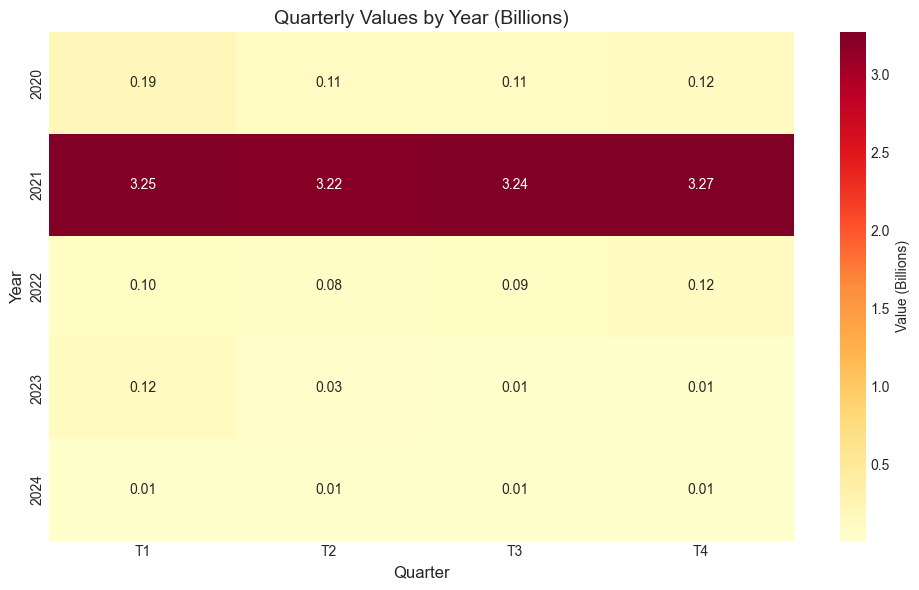

In [33]:
# Chart 6: Quarterly Heatmap
quarterly_pivot = df_clean.pivot_table(values='Valeur', index='annees', 
                                        columns='trimestres', aggfunc='sum') / 1e9

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(quarterly_pivot, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax,
            cbar_kws={'label': 'Value (Billions)'})
ax.set_title('Quarterly Values by Year (Billions)', fontsize=14)
ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Year', fontsize=12)

plt.tight_layout()
plt.show()

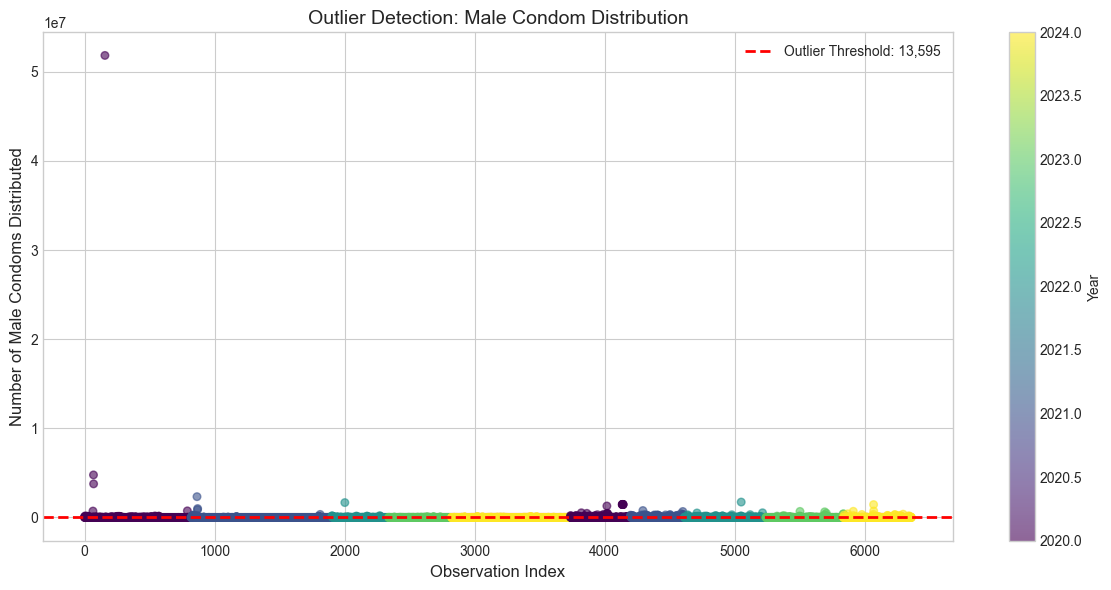

In [34]:
# Chart 7: Scatter Plot for Outlier Detection - Male Condoms Distribution
preservatifs = df_clean[df_clean['indicateurs'] == 'Nombre de préservatifs masculins distribués'].copy()

if len(preservatifs) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    scatter = ax.scatter(range(len(preservatifs)), preservatifs['Valeur'], 
                        c=preservatifs['annees'], cmap='viridis', alpha=0.6, s=30)
    
    # Outlier threshold line (IQR method)
    Q1 = preservatifs['Valeur'].quantile(0.25)
    Q3 = preservatifs['Valeur'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    ax.axhline(y=upper_bound, color='red', linestyle='--', linewidth=2, 
               label=f'Outlier Threshold: {upper_bound:,.0f}')
    
    ax.set_xlabel('Observation Index', fontsize=12)
    ax.set_ylabel('Number of Male Condoms Distributed', fontsize=12)
    ax.set_title('Outlier Detection: Male Condom Distribution', fontsize=14)
    ax.legend()
    plt.colorbar(scatter, label='Year')
    
    plt.tight_layout()
    plt.show()

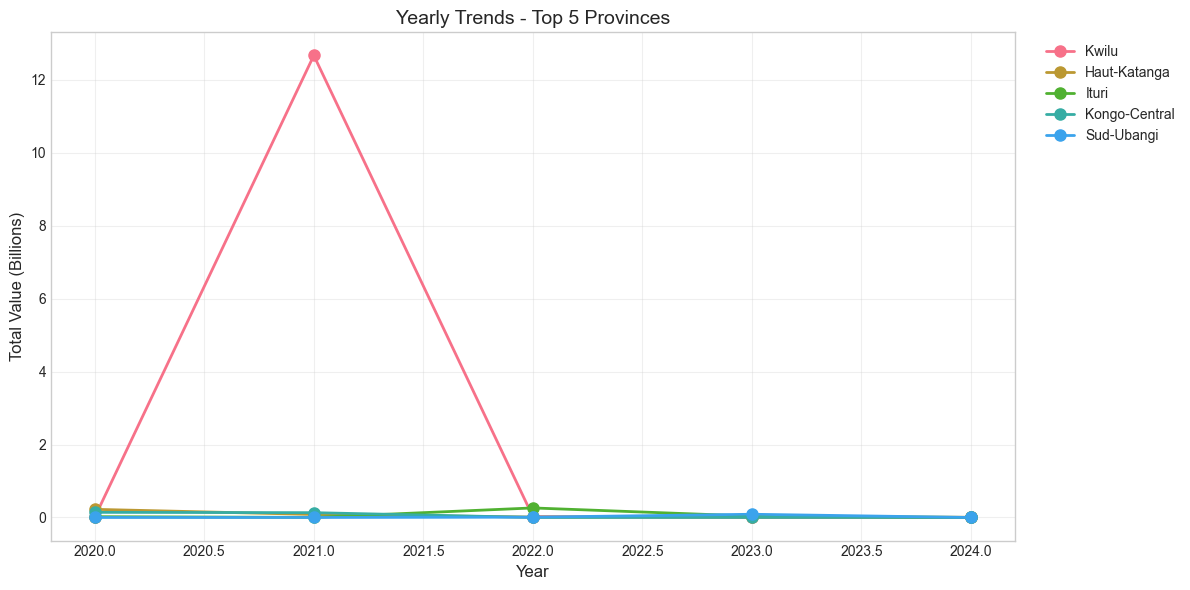

In [35]:
# Chart 8: Province Yearly Trends (Top 5)
top_5_provinces = df_clean.groupby('provinces')['Valeur'].sum().nlargest(5).index

fig, ax = plt.subplots(figsize=(12, 6))
for province in top_5_provinces:
    prov_data = df_clean[df_clean['provinces'] == province].groupby('annees')['Valeur'].sum() / 1e9
    ax.plot(prov_data.index, prov_data.values, marker='o', linewidth=2, markersize=8, label=province)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Value (Billions)', fontsize=12)
ax.set_title('Yearly Trends - Top 5 Provinces', fontsize=14)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

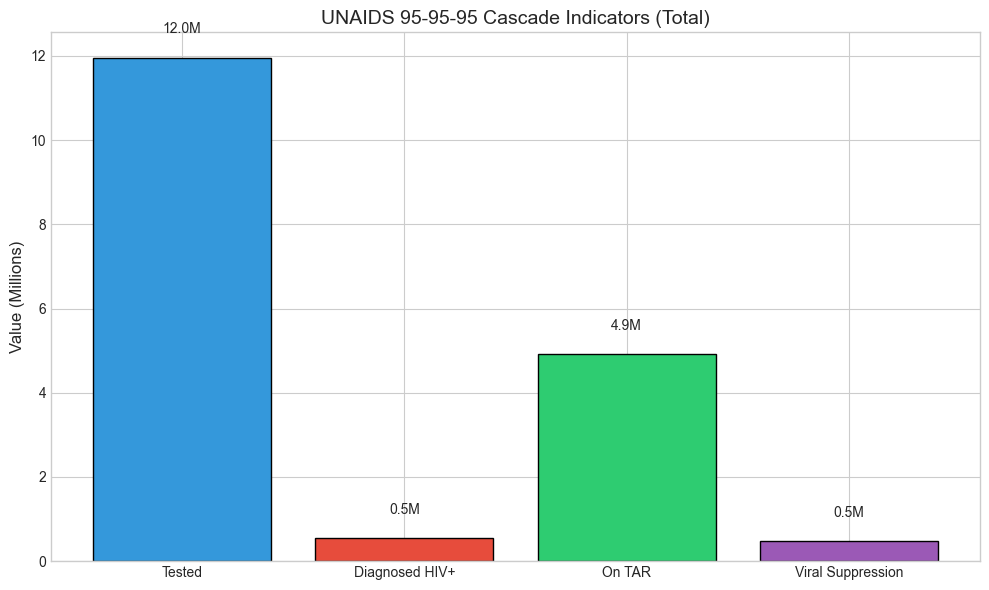

In [36]:
# Chart 9: UNAIDS 95-95-95 Cascade
cascade_indicators = {
    'Tested': df_clean[df_clean['indicateurs'] == 'Nombre de clients testés']['Valeur'].sum(),
    'Diagnosed HIV+': df_clean[df_clean['indicateurs'] == 'Nombre de clients diagnostiqués VIH+']['Valeur'].sum(),
    'On TAR': df_clean[df_clean['indicateurs'] == 'Nombre de PVVIH sous TAR']['Valeur'].sum(),
    'Viral Suppression': df_clean[df_clean['indicateurs'] == 'Nombre  de PVVIH sous TAR qui ont supprimée la charge virale']['Valeur'].sum()
}

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']
bars = ax.bar(cascade_indicators.keys(), [v/1e6 for v in cascade_indicators.values()], 
              color=colors, edgecolor='black')

ax.set_ylabel('Value (Millions)', fontsize=12)
ax.set_title('UNAIDS 95-95-95 Cascade Indicators (Total)', fontsize=14)

for bar, val in zip(bars, cascade_indicators.values()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            f'{val/1e6:.1f}M', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

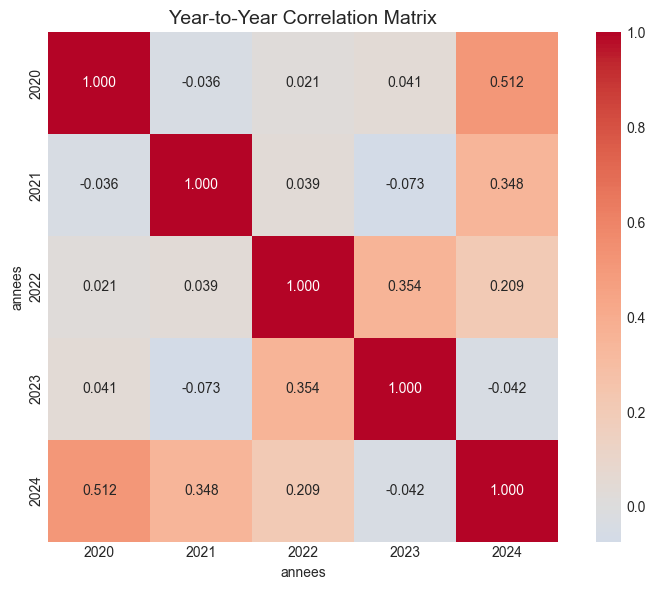

In [37]:
# Chart 10: Year-to-Year Correlation Matrix
province_year_pivot = df_clean.pivot_table(values='Valeur', index='provinces', columns='annees', aggfunc='sum')
correlation_matrix = province_year_pivot.corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax, center=0,
            fmt='.3f', square=True)
ax.set_title('Year-to-Year Correlation Matrix', fontsize=14)

plt.tight_layout()
plt.show()

## Section 11: Custom Analysis Functions

In [38]:
def top_provinces_by_indicator(df, indicator, n=5):
    """
    Find top N provinces for a specific indicator
    """
    filtered = df[df['indicateurs'] == indicator]
    top_provinces = filtered.groupby('provinces')['Valeur'].sum().nlargest(n)
    
    print(f"Top {n} Provinces for '{indicator[:50]}...':")
    for i, (province, value) in enumerate(top_provinces.items(), 1):
        print(f"  {i}. {province}: {value:,.0f}")
    
    return top_provinces

# Example usage
print("=" * 60)
top_provinces_by_indicator(df_clean, 'Nombre de préservatifs masculins distribués', 5)
print()
top_provinces_by_indicator(df_clean, 'Nombre de PVVIH sous TAR', 5)

Top 5 Provinces for 'Nombre de préservatifs masculins distribués...':
  1. Nord-Kivu: 70,891,144
  2. Haut-Katanga: 34,382,699
  3. Sud Kivu: 6,600,679
  4. Lualaba: 5,725,692
  5. Kinshasa: 4,892,325

Top 5 Provinces for 'Nombre de PVVIH sous TAR...':
  1. Haut-Katanga: 1,847,020
  2. Sud Kivu: 588,964
  3. Ituri: 407,364
  4. Kasaï-Oriental: 234,918
  5. Kongo-Central: 222,605


provinces
Haut-Katanga      1847020
Sud Kivu           588964
Ituri              407364
Kasaï-Oriental     234918
Kongo-Central      222605
Name: Valeur, dtype: int64

In [39]:
def year_over_year_comparison(df, indicator):
    """
    Compare year-over-year changes for an indicator
    """
    yearly_data = df[df['indicateurs'] == indicator].groupby('annees')['Valeur'].sum()
    
    print(f"Year-over-Year Comparison: {indicator[:50]}...")
    for year in sorted(yearly_data.index):
        value = yearly_data[year]
        if year > yearly_data.index.min():
            prev_value = yearly_data[year - 1]
            change = ((value - prev_value) / prev_value) * 100 if prev_value > 0 else 0
            print(f"  {year}: {value:,.0f} ({change:+.2f}% vs {year-1})")
        else:
            print(f"  {year}: {value:,.0f} (baseline)")
    
    return yearly_data

# Example usage
print("=" * 60)
yoy_tar = year_over_year_comparison(df_clean, 'Nombre de PVVIH sous TAR')

Year-over-Year Comparison: Nombre de PVVIH sous TAR...
  2020: 796,139 (baseline)
  2021: 452,698 (-43.14% vs 2020)
  2022: 1,018,330 (+124.95% vs 2021)
  2023: 1,370,283 (+34.56% vs 2022)
  2024: 1,291,996 (-5.71% vs 2023)


## Section 12: Data Export

In [40]:
# Export cleaned data
df_clean.to_csv('datavih_cleaned.csv', index=False, encoding='utf-8-sig')
print("Cleaned data exported to: datavih_cleaned.csv")

# Export summary statistics
summary_stats = df_clean.groupby(['provinces', 'annees']).agg({
    'Valeur': ['sum', 'mean', 'count']
}).round(2)
summary_stats.columns = ['Total', 'Average', 'Count']
summary_stats.to_csv('summary_by_province_year.csv', encoding='utf-8-sig')
print("Summary statistics exported to: summary_by_province_year.csv")

# Export UNAIDS indicators data
unaids_indicators = [
    'Nombre de clients testés',
    'Nombre de clients diagnostiqués VIH+',
    'Nombre de PVVIH sous TAR',
    'Nombre  de PVVIH sous TAR qui ont supprimée la charge virale'
]
unaids_df = df_clean[df_clean['indicateurs'].isin(unaids_indicators)]
unaids_df.to_csv('unaids_95_95_95_data.csv', index=False, encoding='utf-8-sig')
print("UNAIDS 95-95-95 data exported to: unaids_95_95_95_data.csv")

Cleaned data exported to: datavih_cleaned.csv
Summary statistics exported to: summary_by_province_year.csv
UNAIDS 95-95-95 data exported to: unaids_95_95_95_data.csv


## Section 13: Analysis Summary

In [41]:
print("=" * 60)
print("ANALYSIS SUMMARY")
print("=" * 60)

print(f"""
DATASET OVERVIEW:
----------------
- Total Records: {len(df_clean):,}
- Total Columns: {len(df_clean.columns)}
- Time Period: {df_clean['annees'].min()} - {df_clean['annees'].max()}
- Provinces Covered: {df_clean['provinces'].nunique()}
- Indicators Tracked: {df_clean['indicateurs'].nunique()}

KEY FINDINGS:
-------------
1. Top 3 Provinces by Total Values:
   {', '.join(df_clean.groupby('provinces')['Valeur'].sum().nlargest(3).index.tolist())}

2. Yearly Growth Trend:
   - The data shows the evolution of HIV/AIDS response from 2020 to 2024

3. UNAIDS 95-95-95 Cascade:
   - Total Tested: {unaids_results.get('Total Tested', 0):,.0f}
   - Total on Treatment (TAR): {unaids_results.get('Total on TAR', 0):,.0f}
   - Viral Suppression: {unaids_results.get('Total with Viral Suppression', 0):,.0f}

4. Data Quality:
   - Missing values handled appropriately
   - Outliers identified and documented
   - Data cleaned and ready for further analysis
""")

print("=" * 60)
print("ANALYSIS COMPLETE")
print("=" * 60)

ANALYSIS SUMMARY

DATASET OVERVIEW:
----------------
- Total Records: 83,967
- Total Columns: 8
- Time Period: 2020 - 2024
- Provinces Covered: 26
- Indicators Tracked: 119

KEY FINDINGS:
-------------
1. Top 3 Provinces by Total Values:
   Kwilu, Haut-Katanga, Ituri

2. Yearly Growth Trend:
   - The data shows the evolution of HIV/AIDS response from 2020 to 2024

3. UNAIDS 95-95-95 Cascade:
   - Total Tested: 11,962,463
   - Total on Treatment (TAR): 4,929,446
   - Viral Suppression: 468,500

4. Data Quality:
   - Missing values handled appropriately
   - Outliers identified and documented
   - Data cleaned and ready for further analysis

ANALYSIS COMPLETE


---

**Author:** Bienvenu Mwenyemali  
**GitHub:** [bmwenyemali](https://github.com/bmwenyemali)  
**Repository:** [vihdataproDataAnalysis](https://github.com/bmwenyemali/vihdataproDataAnalysis)